## SEPARACIÓN DE DATA COMPLETA POR AÑO

In [2]:
import pandas as pd
from sys import getsizeof

#### En primer no  podemos cargar en este caso toda la data, por lo que el proceso se facilitará mediante el uso de chunks. Seccionando la carga en cantidades mas pequeñas y manejables.

In [2]:
cont=0
for chunk in pd.read_csv('train.csv', chunksize=100000):
        if cont%10==0:
            print("progreso: ",cont," chunks.")
        chunk['key']=chunk['key'].str.split('-',n=1,expand=True)[0]
        groups_chunk = chunk.groupby(chunk['key'])
        for i in range(len(chunk.key.unique())):
               nombre_csv=chunk.key.unique()[i]+".csv"
               if cont==0:
                   groups_chunk.get_group(chunk.key.unique()[i]).to_csv(nombre_csv,index=False,mode='a')
               else:
                   groups_chunk.get_group(chunk.key.unique()[i]).to_csv(nombre_csv,index=False,header=False,mode='a')
        cont=cont+1
print("Finalizo separación.")

progreso:  0  chunks.
progreso:  10  chunks.
progreso:  20  chunks.
progreso:  30  chunks.
progreso:  40  chunks.
progreso:  50  chunks.
progreso:  60  chunks.
progreso:  70  chunks.
progreso:  80  chunks.
progreso:  90  chunks.
progreso:  100  chunks.
progreso:  110  chunks.
progreso:  120  chunks.
progreso:  130  chunks.
progreso:  140  chunks.
progreso:  150  chunks.
progreso:  160  chunks.
progreso:  170  chunks.
progreso:  180  chunks.
progreso:  190  chunks.
progreso:  200  chunks.
progreso:  210  chunks.
progreso:  220  chunks.
progreso:  230  chunks.
progreso:  240  chunks.
progreso:  250  chunks.
progreso:  260  chunks.
progreso:  270  chunks.
progreso:  280  chunks.
progreso:  290  chunks.
progreso:  300  chunks.
progreso:  310  chunks.
progreso:  320  chunks.
progreso:  330  chunks.
progreso:  340  chunks.
progreso:  350  chunks.
progreso:  360  chunks.
progreso:  370  chunks.
progreso:  380  chunks.
progreso:  390  chunks.
progreso:  400  chunks.
progreso:  410  chunks.
pro

In [4]:
import os
contenido = os.listdir('/home/adr/my_project_dir/PracticaCalificada2-CC421/separacion_completa')
contenido

['train.csv',
 '2010.csv',
 '.ipynb_checkpoints',
 '2009.csv',
 '2011.csv',
 '2013.csv',
 '2014.csv',
 'Separacion de Registros por año (DATA COMPLETA).ipynb',
 '2012.csv',
 '2015.csv']

In [6]:
años=['2009','2010','2011','2012','2013','2014','2015']
suma=0
for i in range(len(años)):
                nombre_csv=años[i]+".csv"
                tamaño_archivo=pd.read_csv(nombre_csv).shape[0]
                print(años[i],":",tamaño_archivo)
                suma+=tamaño_archivo
print("Suma total de Registros: ",suma)

2009 : 8543166
2010 : 8354997
2011 : 8841346
2012 : 8919666
2013 : 8655190
2014 : 8252682
2015 : 3856809
Suma total de Registros:  55423856


#### Corroboremos que la suma anterior coincida con el numero de lineas del archivo original

In [10]:
numeroLineas = sum(1 for row in (open('train.csv')))
print(numeroLineas-1) #Restamos 1 ya que el numero total de registros no toma en cuenta la cabezera

55423856


## TRABAJANDO CON DATA AÑO 2009

#### Visualizemos por ejemplo el archivo 2009.csv que contiene todos los registros del año 2009

In [13]:
pd.read_csv('2009.csv').head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2009,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2
2,2009,4.10,2009-11-06 01:04:03 UTC,-73.991601,40.744712,-73.983081,40.744682,2
3,2009,5.30,2009-07-22 16:08:00 UTC,-73.981060,40.737690,-73.994177,40.728412,1
4,2009,4.50,2009-08-06 18:17:23 UTC,-73.991707,40.770505,-73.985459,40.763671,1
5,2009,6.10,2009-12-10 15:37:00 UTC,-73.969622,40.756973,-73.981152,40.759712,1
6,2009,31.90,2009-01-09 16:10:00 UTC,-73.873027,40.773883,-73.984545,40.769545,3
7,2009,9.80,2009-03-02 20:42:49 UTC,-73.972673,40.759186,-73.969897,40.791367,1
8,2009,12.10,2009-06-10 21:28:00 UTC,-73.988558,40.737200,-73.958688,40.780748,1
9,2009,6.50,2009-03-23 12:13:29 UTC,-73.985430,40.736011,-73.982501,40.724802,1


#### Ahora realizaremos una conversion de datos, para que el dataframe que se almacene sea de un tamaño mas pequeño.

In [2]:

import datetime as dt

data_reduce_2009=pd.DataFrame({},columns = ['key','fare_amount', 'pickup_datetime', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
TamañoChunks = 100000
iteracion=0
for chunk in pd.read_csv('2009.csv', chunksize=TamañoChunks):
        chunk['pickup_datetime']=pd.to_datetime(chunk['pickup_datetime'])
        chunk['pickup_datetime']=chunk['pickup_datetime'].map(dt.datetime.toordinal)
        data_reduce_2009 = pd.concat([data_reduce_2009,chunk])
        iteracion=iteracion+1
        print('Chunk dataframe %d '%iteracion +'size acumulado: %2.4f GB'%(getsizeof(data_reduce_2009)/(1024.0**3)))

Chunk dataframe 1 size acumulado: 0.0142 GB
Chunk dataframe 2 size acumulado: 0.0283 GB
Chunk dataframe 3 size acumulado: 0.0425 GB
Chunk dataframe 4 size acumulado: 0.0566 GB
Chunk dataframe 5 size acumulado: 0.0708 GB
Chunk dataframe 6 size acumulado: 0.0849 GB
Chunk dataframe 7 size acumulado: 0.0991 GB
Chunk dataframe 8 size acumulado: 0.1132 GB
Chunk dataframe 9 size acumulado: 0.1274 GB
Chunk dataframe 10 size acumulado: 0.1416 GB
Chunk dataframe 11 size acumulado: 0.1557 GB
Chunk dataframe 12 size acumulado: 0.1699 GB
Chunk dataframe 13 size acumulado: 0.1840 GB
Chunk dataframe 14 size acumulado: 0.1982 GB
Chunk dataframe 15 size acumulado: 0.2123 GB
Chunk dataframe 16 size acumulado: 0.2265 GB
Chunk dataframe 17 size acumulado: 0.2407 GB
Chunk dataframe 18 size acumulado: 0.2548 GB
Chunk dataframe 19 size acumulado: 0.2690 GB
Chunk dataframe 20 size acumulado: 0.2831 GB
Chunk dataframe 21 size acumulado: 0.2973 GB
Chunk dataframe 22 size acumulado: 0.3114 GB
Chunk dataframe 23 

#### Salvaremos esta transformacion en un archivo .csv

In [ ]:
data_reduce_2009.to_csv('data_reduce_2009.csv',index=False,mode='a')

#### Cargamos el archivo .csv

In [3]:
data_reduce_2009=pd.read_csv('data_reduce_2009.csv')
print('size data_reduce_2009: %2.4f GB'%(getsizeof(data_reduce_2009)/(1024.0**3)))

size data_reduce_2009: 0.5092 GB


#### Verificamos que ningun dato se haya perdido

In [5]:
data_reduce_2009.shape[0]

8543166

#### Realizamos una pequeña transformacion a los datos para hacer mas ligero el dataframe

In [4]:
data_reduce_2009['pickup_datetime']=data_reduce_2009['pickup_datetime'].astype('uint32')      
data_reduce_2009['fare_amount']=data_reduce_2009['fare_amount'].astype('float32')
data_reduce_2009['passenger_count']=data_reduce_2009['passenger_count'].astype('uint8')

In [5]:
print('size data_reduce_2009: %2.4f GB'%(getsizeof(data_reduce_2009)/(1024.0**3)))

size data_reduce_2009: 0.3899 GB


#### Mostramos los 20 primeros registros de la data reducida del 2009, este dataframe ya es de 1.2 GB controlable para nuestro entorno.

In [8]:
data_reduce_2009.head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009,4.50,733573,-73.844311,40.721319,-73.841610,40.712278,1
1,2009,8.90,733652,-73.980658,40.733873,-73.991540,40.758138,2
2,2009,4.10,733717,-73.991601,40.744712,-73.983081,40.744682,2
3,2009,5.30,733610,-73.981060,40.737690,-73.994177,40.728412,1
4,2009,4.50,733625,-73.991707,40.770505,-73.985459,40.763671,1
5,2009,6.10,733751,-73.969622,40.756973,-73.981152,40.759712,1
6,2009,31.90,733416,-73.873027,40.773883,-73.984545,40.769545,3
7,2009,9.80,733468,-73.972673,40.759186,-73.969897,40.791367,1
8,2009,12.10,733568,-73.988558,40.737200,-73.958688,40.780748,1
9,2009,6.50,733489,-73.985430,40.736011,-73.982501,40.724802,1


#### Haremos finalmente unos ultimos filtros, verifiquemos si existen datos con Nan

In [9]:
data_reduce_2009.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#### Nos quedamos solo co aquellos registros con longitud y latitud diferentes a 0.

In [6]:
data_reduce_2009=data_reduce_2009[data_reduce_2009.pickup_longitude !=0]
data_reduce_2009=data_reduce_2009[data_reduce_2009.pickup_latitude !=0]
data_reduce_2009=data_reduce_2009[data_reduce_2009.dropoff_longitude !=0]
data_reduce_2009=data_reduce_2009[data_reduce_2009.dropoff_latitude !=0]

#### Finalmente nos quedamos con una data habil de:

In [14]:
print(data_reduce_2009.shape[0]," registros de 8543166")

8435960  registros de 8543166


#### Procedemos a separar la data de entrenamiento y test

Notar que esta partición la exportaremos en archivos .csv para poder usarlos luego.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_reduce_2009, test_size = 0.30, random_state = 1000)
train.to_csv('data_reduce_2009_train.csv',index=False,mode='a')
test.to_csv('data_reduce_2009_test.csv',index=False,mode='a')

In [1]:
import pandas as pd
predictores = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
salida = 'fare_amount'
X_train=pd.read_csv('data_reduce_2009_train.csv')[predictores]
y_train=pd.read_csv('data_reduce_2009_train.csv')[salida]
X_test=pd.read_csv('data_reduce_2009_test.csv')[predictores]
y_test=pd.read_csv('data_reduce_2009_test.csv')[salida]

assert X_train.shape[0]==y_train.shape[0], 'Train No tiene el mismo numero de registros'
assert X_test.shape[0]==y_test.shape[0], 'Test No tiene el mismo numero de registros'
assert X_train.shape[0]+X_test.shape[0]==8435960, 'Existen registros faltantes'
assert y_train.shape[0]+y_test.shape[0]==8435960, 'Existen registros faltantes'



#### Procederemos a hacer el escalamiento con standard scaler

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

#### Entrenamiento con Modelo DecisionTreeRegressor

In [3]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
regresor = DecisionTreeRegressor(random_state=0)
regresor.fit(X_train_s, y_train)
y_pred=regresor.predict(X_test_s)

#### Calcularemos Puntuaciones para la predicción que obtuvo el modelo

Puntuación de r2_score

In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
r2_score(y_test, y_pred)

0.6640539558970946

Puntuación de explained_variance_score

In [5]:
explained_variance_score(y_test, y_pred)

0.6641133991869008

Puntuación de mean_squared_error

In [6]:
mean_squared_error(y_test, y_pred)

22.46584517456517

#### Entrenamiento con Modelo RandomForestRegressor con 5 estimadores

In [7]:
from sklearn.ensemble import RandomForestRegressor
regresor = RandomForestRegressor(n_estimators=5,random_state=0)
regresor.fit(X_train_s, y_train)
y_pred=regresor.predict(X_test_s)

In [8]:
r2_score(y_test, y_pred)

0.7942464973034349

In [9]:
explained_variance_score(y_test, y_pred)

0.7943005040348528

In [10]:
mean_squared_error(y_test, y_pred)

13.759430768262265

#### Entrenamiento con Modelo RandomForestRegressor con 10 estimadores

In [11]:
from sklearn.ensemble import RandomForestRegressor
regresor = RandomForestRegressor(n_estimators=10,random_state=0)
regresor.fit(X_train_s, y_train)
y_pred=regresor.predict(X_test_s)

In [12]:
r2_score(y_test, y_pred)

0.8114548273699972

In [13]:
explained_variance_score(y_test, y_pred)

0.811507887031693

In [14]:
mean_squared_error(y_test, y_pred)

12.608651689971406

#### Importancia de Características

Vemos que la caracteristica menos importante para el modelo es la cantidad de pasajeros y las mas alta el dropoff_longitude

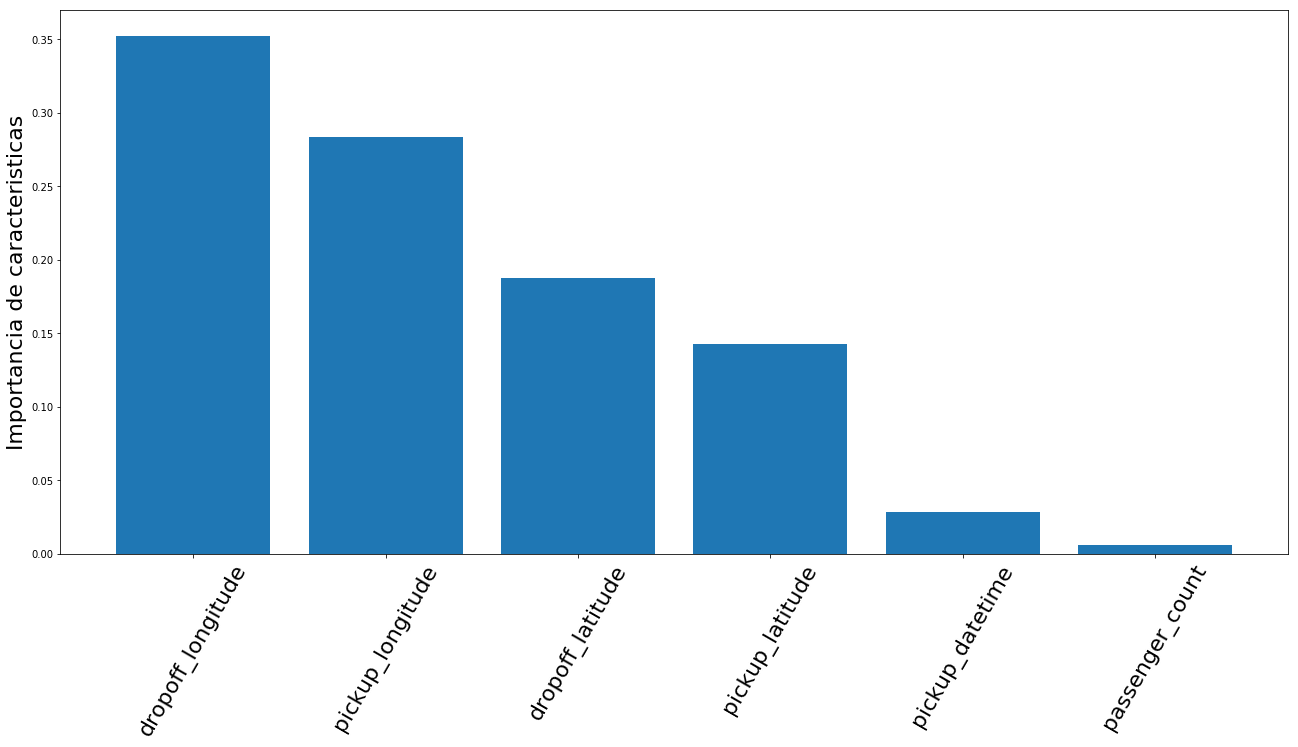

In [16]:
import numpy as np
plt=__import__("matplotlib.pyplot")
features = [predictores[x] for x in np.argsort(regresor.feature_importances_)][::-1]
fig, ax = plt.pyplot.subplots(figsize=(22, 10))
ax.bar([i for i in range(6)], np.sort(regresor.feature_importances_)[::-1], align='center')
ax.set_ylabel('Importancia de caracteristicas', fontsize=22)
plt.pyplot.xticks([i for i in range(len(features))], features, rotation=60, fontsize=22)
plt.pyplot.show()

#### Entrenamiento con Modelo RandomForestRegressor con 15 estimadores

El puntaje de este modelo es el mejor hasta ahora, por lo que nos quedaremos con este modelo.

In [17]:
from sklearn.ensemble import RandomForestRegressor
regresor = RandomForestRegressor(n_estimators=15,random_state=0)
regresor.fit(X_train, y_train)
y_pred=regresor.predict(X_test)

In [18]:
r2_score(y_test, y_pred)

0.8170844265321263

In [19]:
explained_variance_score(y_test, y_pred)

0.8171440860984241

In [20]:
mean_squared_error(y_test, y_pred)

12.232181404366509

#### Guardaremos el modelo con mejor puntaje

In [21]:
joblib.dump(regresor,'RF_15_2009.pkl')

['RF_15_2009.pkl']

In [ ]:
regresor=joblib.load('RF_15_2009.pkl')

## TRABAJANDO CON DATA AÑO 2010

Procederemos de la misma manera con este año en especifico, por lo que se dejara de comentar los pasos.

In [3]:
import datetime as dt
import pandas as pd
from sys import getsizeof
data_reduce_2010=pd.DataFrame({},columns = ['key','fare_amount', 'pickup_datetime', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
TamañoChunks = 100000
iteracion=0
for chunk in pd.read_csv('2010.csv', chunksize=TamañoChunks):
        chunk['pickup_datetime']=pd.to_datetime(chunk['pickup_datetime'])
        chunk['pickup_datetime']=chunk['pickup_datetime'].map(dt.datetime.toordinal)
        data_reduce_2010 = pd.concat([data_reduce_2010,chunk])
        iteracion=iteracion+1
        if iteracion%5==0:
            print('Chunk dataframe %d '%iteracion +'size acumulado: %2.4f GB'%(getsizeof(data_reduce_2010)/(1024.0**3)))

Chunk dataframe 5 size acumulado: 0.0726 GB
Chunk dataframe 10 size acumulado: 0.1453 GB
Chunk dataframe 15 size acumulado: 0.2179 GB
Chunk dataframe 20 size acumulado: 0.2906 GB
Chunk dataframe 25 size acumulado: 0.3632 GB
Chunk dataframe 30 size acumulado: 0.4359 GB
Chunk dataframe 35 size acumulado: 0.5085 GB
Chunk dataframe 40 size acumulado: 0.5811 GB
Chunk dataframe 45 size acumulado: 0.6538 GB
Chunk dataframe 50 size acumulado: 0.7264 GB
Chunk dataframe 55 size acumulado: 0.7991 GB
Chunk dataframe 60 size acumulado: 0.8717 GB
Chunk dataframe 65 size acumulado: 0.9444 GB
Chunk dataframe 70 size acumulado: 1.0170 GB
Chunk dataframe 75 size acumulado: 1.0896 GB
Chunk dataframe 80 size acumulado: 1.1623 GB


In [4]:
data_reduce_2010.shape[0]

8354997

In [5]:
data_reduce_2010.to_csv('data_reduce_2010.csv',index=False,mode='a')

In [6]:
data_reduce_2010=pd.read_csv('data_reduce_2010.csv')

In [7]:
data_reduce_2010.head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010,16.90,733777,-74.016048,40.711303,-73.979268,40.782004,1
1,2010,5.30,733840,-73.968095,40.768008,-73.956655,40.783762,1
2,2010,5.30,733960,-73.969505,40.784843,-73.958732,40.783357,1
3,2010,10.50,734022,-73.985382,40.747858,-73.978377,40.762070,1
4,2010,4.90,734112,-74.000632,40.747473,-73.986672,40.740577,1
5,2010,34.67,733923,-73.985427,40.758853,-73.872907,40.774497,1
6,2010,3.70,733803,-74.001630,40.730767,-73.997112,40.737533,1
7,2010,6.90,733906,-73.955118,40.768942,-73.963495,40.761887,2
8,2010,15.07,734000,-73.961933,40.795585,-73.962253,40.764817,2
9,2010,7.70,734110,-73.996601,40.736569,-73.982152,40.744322,1


In [9]:
data_reduce_2010.shape[0]

8354997

In [10]:
data_reduce_2010.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    3
dropoff_latitude     3
passenger_count      0
dtype: int64

In [11]:
data_reduce_2010=data_reduce_2010.dropna(axis=0)

In [12]:
data_reduce_2010.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
data_reduce_2010=data_reduce_2010[data_reduce_2010.pickup_longitude !=0]
data_reduce_2010=data_reduce_2010[data_reduce_2010.pickup_latitude !=0]
data_reduce_2010=data_reduce_2010[data_reduce_2010.dropoff_longitude !=0]
data_reduce_2010=data_reduce_2010[data_reduce_2010.dropoff_latitude !=0]

In [14]:
print(data_reduce_2010.shape[0]," registros de 8354997")

8176426  registros de 8354997


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_reduce_2010, test_size = 0.30, random_state = 1000)
train.to_csv('data_reduce_2010_train.csv',index=False,mode='a')
test.to_csv('data_reduce_2010_test.csv',index=False,mode='a')

In [17]:
predictores = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
salida = 'fare_amount'
X_train=pd.read_csv('data_reduce_2010_train.csv')[predictores]
y_train=pd.read_csv('data_reduce_2010_train.csv')[salida]
X_test=pd.read_csv('data_reduce_2010_test.csv')[predictores]
y_test=pd.read_csv('data_reduce_2010_test.csv')[salida]

assert X_train.shape[0]==y_train.shape[0], 'Train No tiene el mismo numero de registros'
assert X_test.shape[0]==y_test.shape[0], 'Test No tiene el mismo numero de registros'
assert X_train.shape[0]+X_test.shape[0]==8176426, 'Existen registros faltantes'
assert y_train.shape[0]+y_test.shape[0]==8176426, 'Existen registros faltantes'

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

In [32]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error


#### Entrenamiento con Modelo RandomForestRegressor con 10 estimadores

Nuestra puntuacion es baja, por lo que es recomendable intentar otro tipo de regresor, no es un buen modelo.

In [38]:
from sklearn.ensemble import RandomForestRegressor
regresor = RandomForestRegressor(n_estimators=10,random_state=0)
regresor.fit(X_train_s, y_train)
y_pred=regresor.predict(X_test_s)

In [39]:
r2_score(y_test, y_pred)

0.4875833717182503

In [40]:
explained_variance_score(y_test, y_pred)

0.4876436909409292

In [41]:
mean_squared_error(y_test, y_pred)

54.976648122283514

## TRABAJANDO CON DATA AÑO 2011

Procederemos de la misma manera con este año en especifico, por lo que se dejara de comentar los pasos.

In [1]:
import datetime as dt
import pandas as pd
from sys import getsizeof
data_reduce_2011=pd.DataFrame({},columns = ['key','fare_amount', 'pickup_datetime', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
TamañoChunks = 100000
iteracion=0
for chunk in pd.read_csv('2011.csv', chunksize=TamañoChunks):
        chunk['pickup_datetime']=pd.to_datetime(chunk['pickup_datetime'])
        chunk['pickup_datetime']=chunk['pickup_datetime'].map(dt.datetime.toordinal)
        data_reduce_2011 = pd.concat([data_reduce_2011,chunk])
        iteracion=iteracion+1
        if iteracion%5==0:
            print('Chunk dataframe %d '%iteracion +'size acumulado: %2.4f GB'%(getsizeof(data_reduce_2011)/(1024.0**3)))

Chunk dataframe 5 size acumulado: 0.0726 GB
Chunk dataframe 10 size acumulado: 0.1452 GB
Chunk dataframe 15 size acumulado: 0.2178 GB
Chunk dataframe 20 size acumulado: 0.2905 GB
Chunk dataframe 25 size acumulado: 0.3631 GB
Chunk dataframe 30 size acumulado: 0.4357 GB
Chunk dataframe 35 size acumulado: 0.5083 GB
Chunk dataframe 40 size acumulado: 0.5809 GB
Chunk dataframe 45 size acumulado: 0.6535 GB
Chunk dataframe 50 size acumulado: 0.7262 GB
Chunk dataframe 55 size acumulado: 0.7988 GB
Chunk dataframe 60 size acumulado: 0.8714 GB
Chunk dataframe 65 size acumulado: 0.9440 GB
Chunk dataframe 70 size acumulado: 1.0166 GB
Chunk dataframe 75 size acumulado: 1.0892 GB
Chunk dataframe 80 size acumulado: 1.1619 GB
Chunk dataframe 85 size acumulado: 1.2345 GB


In [2]:
data_reduce_2011.shape[0]

8841346

In [3]:
data_reduce_2011.to_csv('data_reduce_2011.csv',index=False,mode='a')

In [4]:
data_reduce_2011=pd.read_csv('data_reduce_2011.csv')

In [5]:
data_reduce_2011['pickup_datetime']=data_reduce_2011['pickup_datetime'].astype('uint32')      
data_reduce_2011['fare_amount']=data_reduce_2011['fare_amount'].astype('float32')
data_reduce_2011['passenger_count']=data_reduce_2011['passenger_count'].astype('uint8')

In [6]:
data_reduce_2011.head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011,5.7,734367,-73.982738,40.761270,-73.991242,40.750562,2
1,2011,12.1,734143,-74.000964,40.731630,-73.972892,40.758233,1
2,2011,7.7,734232,-74.001821,40.737547,-73.998060,40.722788,2
3,2011,7.3,734309,-73.991875,40.754437,-73.977230,40.774323,3
4,2011,6.5,734175,0.000000,0.000000,0.000000,0.000000,1
5,2011,4.5,734316,-73.988893,40.760160,-73.986445,40.757857,3
6,2011,5.7,734387,-73.976162,40.744988,-73.990002,40.738323,2
7,2011,18.1,734387,-73.993717,40.740785,-73.999272,40.676617,1
8,2011,8.1,734225,-73.984267,40.744961,-73.981646,40.759608,1
9,2011,10.9,734425,-74.003899,40.725514,-73.976484,40.765537,2


In [7]:
data_reduce_2011.shape[0]

8841346

In [8]:
data_reduce_2011.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    52
dropoff_latitude     52
passenger_count       0
dtype: int64

In [9]:
data_reduce_2011=data_reduce_2011.dropna(axis=0)

In [10]:
data_reduce_2011.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
data_reduce_2011=data_reduce_2011[data_reduce_2011.pickup_longitude !=0]
data_reduce_2011=data_reduce_2011[data_reduce_2011.pickup_latitude !=0]
data_reduce_2011=data_reduce_2011[data_reduce_2011.dropoff_longitude !=0]
data_reduce_2011=data_reduce_2011[data_reduce_2011.dropoff_latitude !=0]

In [12]:
print(data_reduce_2011.shape[0]," registros de 8841346")

8637729  registros de 8841346


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_reduce_2011, test_size = 0.30, random_state = 1000)
train.to_csv('data_reduce_2011_train.csv',index=False,mode='a')
test.to_csv('data_reduce_2011_test.csv',index=False,mode='a')

In [14]:
predictores = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
salida = 'fare_amount'
X_train=pd.read_csv('data_reduce_2011_train.csv')[predictores]
y_train=pd.read_csv('data_reduce_2011_train.csv')[salida]
X_test=pd.read_csv('data_reduce_2011_test.csv')[predictores]
y_test=pd.read_csv('data_reduce_2011_test.csv')[salida]

assert X_train.shape[0]==y_train.shape[0], 'Train No tiene el mismo numero de registros'
assert X_test.shape[0]==y_test.shape[0], 'Test No tiene el mismo numero de registros'
assert X_train.shape[0]+X_test.shape[0]==8637729, 'Existen registros faltantes'
assert y_train.shape[0]+y_test.shape[0]==8637729, 'Existen registros faltantes'

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

#### Entrenamiento con Random Forest con 10 estimadores

In [16]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [17]:
regresor = RandomForestRegressor(n_estimators=10,random_state=0)
regresor.fit(X_train_s, y_train)
y_pred=regresor.predict(X_test_s)

In [18]:
r2_score(y_test, y_pred)

0.8255752323829513

In [19]:
explained_variance_score(y_test, y_pred)

0.8256463539336317

In [20]:
mean_squared_error(y_test, y_pred)

13.234643193875014

#### Entrenamiento con Random Forest con 15 estimadores

El puntaje de este modelo es el mejor hasta ahora, por lo que nos quedaremos con este modelo.

In [21]:
regresor = RandomForestRegressor(n_estimators=15,random_state=0)
regresor.fit(X_train_s, y_train)
y_pred=regresor.predict(X_test_s)

In [22]:
r2_score(y_test, y_pred)

0.8310299030115015

In [23]:
explained_variance_score(y_test, y_pred)

0.8311006509353349

In [24]:
mean_squared_error(y_test, y_pred)

12.820764932804504

In [ ]:
joblib.dump(regresor,'RF_15_2011.pkl')

## Ensamble de Modelos

En este apartado se pretende usar los mejores modelos generados para el año 2009 y 2011, los que se guardados como RF_15_2009.pkl y RF_15_2011.pkl, la idea principal es generar un modelo conjunto para predecir el costo de tarifa para los registros con años 2009 y 2011.

Para esto se detallan los siguientes pasos:

* Cargar los modelos usando joblib.load('RF_15_2009.pkl') y joblib.load('RF_15_2011.pkl')
* Usar solo la data de test previamente separada y guardada en los archivos data_reduce_2019_test.csv y data_reduce_2011_test.csv y generar una combinacion aleatoria de estos registros y llenar un dataframe de test.
* Realizar las predicciones segun la key de registro:
 Si key=2009 entonces usar RF_15_2009.pkl .
 Si key=2011 usar RF_15_2011.pkl.
* La Puntuación de este modelo ensamblado debería tener una puntuación promedio de los dos modelos.